<a href="https://colab.research.google.com/github/srisaisrikar/Data_690_assignments/blob/main/Assignment_05/Assignment_05_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Jupyter Notebook and used for?

- The Jupyter Notebook is an open-source web application that allows data scientists to create and share documents that integrate live code, equations, computational output, visualizations, and other multimedia resources, along with explanatory text in a single document.

## Everything in a cell
Jupyter notebooks are organized as a set of "cells". Each cell can contain different types of content (markdown text, Python code, R code, etc.) The current cell containing text is a markdown cell, cells with code are code cells, as displayed below.

In [1]:
7*8

56

### Command Mode
- shift + enter run cell, select below -ctrl + enter run cell -option + enter run cell, insert -below -A insert cell above -B insert cell below -C copy cell -V paste cell -D , D delete selected cell -shift + M merge selected cells, or current cell with cell below if only one cell selected -I , I interrupt kernel -0 , 0 restart kernel (with dialog) -Y change cell to code mode -M change cell to markdown mode (good for documentation)

## Working with code


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

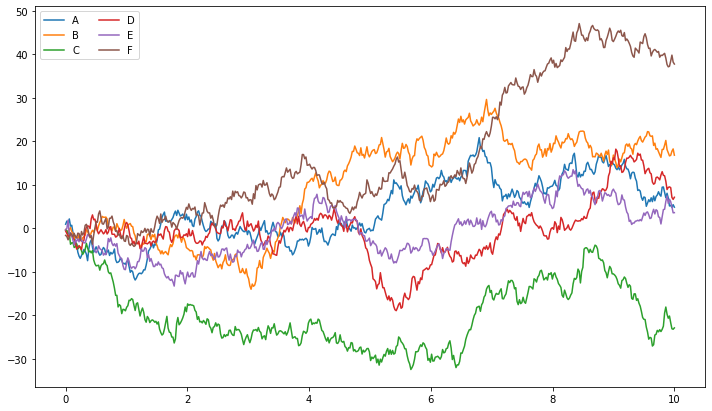

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

##  Interacting with data

In [5]:
import requests
import pandas as pd

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [7]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-25 23:22:23.814412')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

## Bitcoin:

In [10]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-26 00:00:00,18781,18841,18739,18810,55.138476,1.036345e+06
2022-09-26 01:00:00,18809,18929,18747,18769,76.063839,1.432279e+06
2022-09-26 02:00:00,18766,18911,18721,18873,106.202344,1.997512e+06
2022-09-26 03:00:00,18885,18933,18845,18850,53.483875,1.010444e+06
2022-09-26 04:00:00,18850,18944,18834,18874,39.992291,7.554819e+05


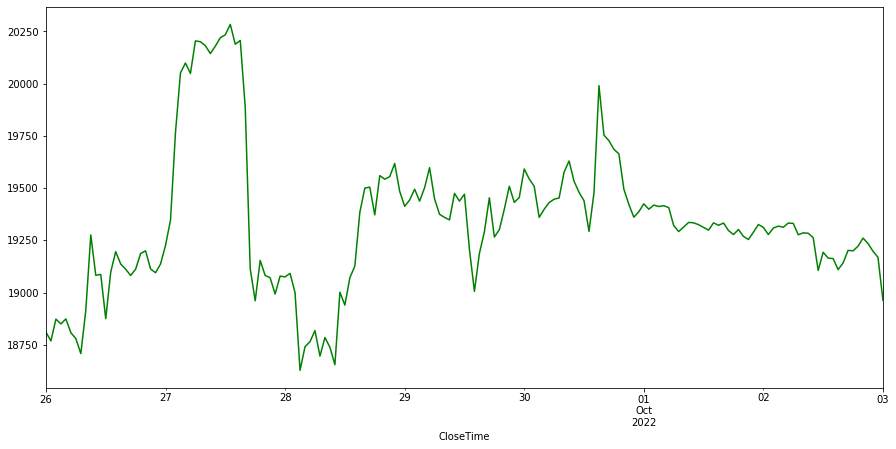

In [11]:
btc['ClosePrice'].plot(figsize=(15,7), color='green')

## Ether:

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-26 00:00:00,1290.7,1300.0,1288.7,1292.6,775.401655,1.003705e+06
2022-09-26 01:00:00,1295.5,1311.2,1290.6,1292.2,1120.278363,1.459183e+06
2022-09-26 02:00:00,1292.5,1307.4,1287.0,1301.5,1678.429339,2.177306e+06
2022-09-26 03:00:00,1301.4,1308.7,1299.4,1304.3,1019.466391,1.329638e+06
2022-09-26 04:00:00,1304.3,1314.3,1301.5,1303.4,708.297186,9.246976e+05


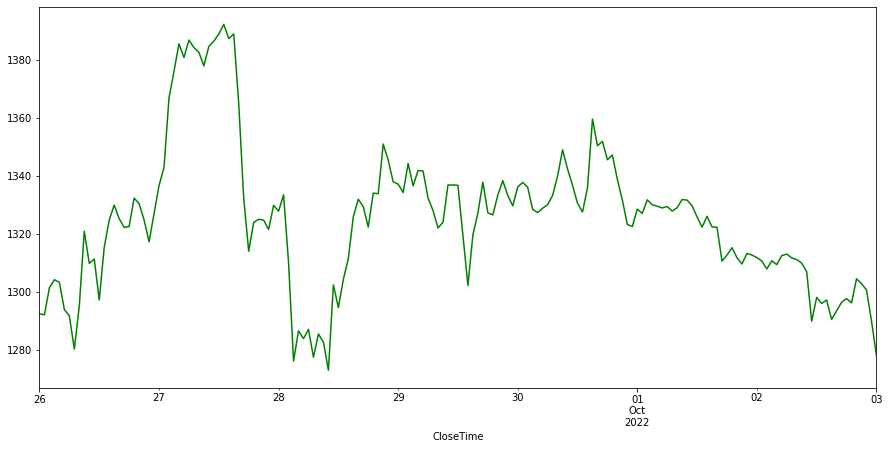

In [13]:
eth['ClosePrice'].plot(figsize=(15, 7),color='green')


In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-26 00:00:00,1290.7,1300.0,1288.7,1292.6,775.401655,1.003705e+06
2022-09-26 01:00:00,1295.5,1311.2,1290.6,1292.2,1120.278363,1.459183e+06
2022-09-26 02:00:00,1292.5,1307.4,1287.0,1301.5,1678.429339,2.177306e+06
2022-09-26 03:00:00,1301.4,1308.7,1299.4,1304.3,1019.466391,1.329638e+06
2022-09-26 04:00:00,1304.3,1314.3,1301.5,1303.4,708.297186,9.246976e+05


## Bonus: Dynamic plots with Bokeh

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [16]:
output_notebook()

In [17]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

# Exporting to Excel

In [18]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [19]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [20]:
eth.to_excel(writer, sheet_name='Ether')

In [21]:
writer.save()